
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 5 - Policy Gradient </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2023 - Nov 30, 2023</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
 
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Policy gradient with and without baseline</a>
* <a href='#2.1'> 2.1 Training Loop</a>
* <a href='#2.2'> 2.2 Policy with Fixed Variance </a>
* <a href='#2.3'> 2.3 PG Objects</a>
* <a href='#3.'> 3. Choosing the value of variance </a>
* <a href='#3.1'> 3.1 Policy with Learned Variance </a>
* <a href='#4.'> 4. PG and experience replay </a>
* <a href='#5.'> 5. Real-world control problems </a>
* <a href='#6.'> 6. Discrete action spaces </a>
* <a href='#7.'> 7. Submitting </a>
* <a href='#7.1'> 7.1 Feedback </a>
* <a href='#8.'> References</a>

<a href='#T1'><b>Student Task 1.</b> Implementing Reinforce PG algorithm </a>\
<a href='#T1a'><b>Student Task 1a.</b> Basic REINFORCE without baseline (15 points) </a>\
<a href='#T1b'><b>Student Task 1b.</b> REINFORCE with a constant baseline b = 20 (5 points) </a>\
<a href='#T1c'><b>Student Task 1c.</b> REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> A good baseline (15 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Making Variance a Learnable Parameter (10 points) </a>\
<a href='#Q2'><b>Student Question 2.1</b> Constant vs Learnable Variance (5 points) </a>\
<a href='#Q3'><b>Student Question 2.2</b> Learnable Variance Initial Performance (5 points) </a> \
<a href='#Q4'><b>Student Question 3.</b> Considering a experience reply buffer (15 points)</a>\
<a href='#Q5'><b>Student Question 4.1</b> Considering an unbounded continuous action space part 1(5 points) </a>\
<a href='#Q6'><b>Student Question 4.2</b> Considering an unbounded continuous action space part 2 (10 points) </a>\
<a href='#Q7'><b>Student Question 5.</b> Considering discrete action spaces (10 points)</a>
    
**Total Points:** 100

# 1. Introduction <a id='1.'></a>
In this exercise, we will implement the REINFORCE policy gradient algorithm for [InvertedPendulum environment](https://gymnasium.farama.org/environments/mujoco/inverted_pendulum/). The InvertedPendulum is similar to the previously used CartPole environment, except it has a continuous action space: the action can now have values in a range of [−3,3]. The action value represents a numerical force applied to the cart, with magnitude representing the amount of force and sign representing the direction.

## 1.2 Learning Objectives <a id='1.2'></a>
- To understand how policy gradient works
- To implement the REINFORCE policy gradient algorithm
- To understand the limits and use cases of policy gradient

## 1.3 Code Structure and Files <a id='1.3'></a>
You don’t have to edit any other file other than ```ex5.ipynb``` to complete this exercise.
```
├───cfg                  # Config files for environments e.g. define the maximum number of steps in an episode.
├───imgs                 # Images used in notebook
├───results 
│   ├───logging          # Contains logged data
│   ├───model            # Contains the policies learned
│   └───video            # Contains videos for each environment
│       └───InvertedPendulum-v4
│       │  └───test      # Videos saved during testing
│       │  └───train     # Videos saved during training
│   ex5.ipynb            # Main assignment file containing tasks <---------
│   setup.py             # Contains setup function
│   utils.py             # Contains useful functions 
```
---
The foundational class, `PG`, stands as the base class for the Policy Gradient. Three additional classes - `PGNoBase(PG)`, `PGBase20(PG)`, and `PGGamma(PG)` - inherit from this base class. Each class corresponds to a different variant of the policy gradient:

- `PGNoBase(PG)`: Implements the vanilla Policy Gradient without a baseline.
- `PGBase20(PG)`: Utilizes a baseline of 20.
- `PGGamma(PG)`: Employs PG gamma with discounted rewards normalized to zero mean and unit variance.

# 2. Policy gradient with and without baseline <a id='2.'></a>

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Reinforce PG algorithm (25 points) </h3> 

Implement the REINFORCE policy gradient algorithm to balance the InvertedPendulum. 
<br> Use constant standard deviation $\sigma = 1$ (i.e. $\log(\sigma) = 0$) for the output action distribution throughout the training. Implement:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (a) basic REINFORCE without baseline (15 points),

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (b) REINFORCE with a constant baseline b = 20 (5 points),

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (c) REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points),
    
**Complete the all the unfinished implementation in following cells (marked with ```TODOs```)**. 
    
1. **Train Loop Function**: Finalize the `train_iteration(agent, env)` function to establish the training loop, similarly to how it was done in Exercise 1.
2. **Policy Class with Fixed Variance**: Complete the `PolicyFixedVar(nn.Module)` class to generate a policy with a fixed variance.
3. **Get Action Method**: Finish the `get_action(self, observation, evaluation=False)` method within the `PG` class, ensuring it can be inherited effectively.
4. **Complete PG Classes**: Implepment the `PGNoBase(PG)`, `PGBase20(PG)`, and `PGGamma(PG)` classes, each tailored with a different baseline.

**Hint:** The ```class PolicyFixedVar(nn.Module)```  contains a basic neural network structure. And we include reasonable
hyperparameters in the ```cfg``` folder.

**Hint:** Your policy should output a probability distribution over actions. A suitable and straightforward choice is to use a normal distribution (`from torch.distributions import Normal`). Compute log probabilities using the `log_prob` function of the distribution. We strongly recommend you to read the official PyTorch documentation to learn how to use the distributions and related functions.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [1]:
# Importing system and path-related modules
import sys
import os
sys.path.insert(0, os.path.abspath(".."))

# Importing PyTorch related modules
import torch
from torch import nn
from torch.distributions import Normal
import torch.nn.functional as F

# Importing other third-party modules
import numpy as np
import yaml
from pathlib import Path
from IPython.display import Video  # to display videos

# Importing local utility modules
import utils as u
from setup import setup

# Setting the device for storing tensors/calculations
device = 'cpu'

## 2.1 Training Loop <a id='2.1'></a>

In the subsequent cell, a foundational framework is provided for training a Reinforcement Learning (RL) agent employing the REINFORCE algorithm. It is constructed to efficiently monitor the agent's progress and performance throughout the training phase. Please complete the training loop, marked with `TODO`, to finalize the setup for the agent’s training process.

In [2]:
def to_numpy(tensor):
    """
    Convert a PyTorch tensor to a NumPy array.

    :param tensor: A PyTorch tensor.
    :return: The converted NumPy array.
    """
    # Squeeze the tensor, move it to CPU and convert to NumPy array
    return tensor.squeeze(0).cpu().numpy()


def train_iteration(agent, env):
    # Policy training function

    # Reset the environment and observe the initial state
    reward_sum, timesteps, done = 0, 0, False
    obs, _ = env.reset(seed=409)
    while not done:
        # TODO: Task 1: finish the train loop, including 
        # 1. Call agent.get_action to get action and log prob of the action
        # 2. Call env.step with the action (note: you need to convert the action into a numpy array -- use the function to_numpy for this)
        #   (Steps 1. and 2. you can also find from the 'test' function below)
        # 3. Store the log prob of action and reward by calling agent.record
        # 4. Update reward_sum by adding the reward received from env.step, and increase timesteps by one
        # 5. Use the observation you receive from env.step to call agent.get_action for the next timestep 
        #   (Hint: ensure to use the `.copy()` method to avoid unexpected behavior due to aliasing.)

        ########### Your code starts here ###########
        # Get action from the agent
        action, action_log_prob = agent.get_action(obs)
        # Perform the action on the environment, get new state and reward
        observation, reward, done, _, info = env.step(to_numpy(action))
        # Store agent's and env's outcome (so that the agent can improve its policy)
        agent.record(action_log_prob, reward)
        # Store total episode reward
        reward_sum += reward
        timesteps += 1
        # update observation
        obs = observation.copy()
        ########## Your codes ends here. ##########
        if timesteps >= 1000:
            done = True
            
    # Update the policy after one episode
    info = agent.update()

    # Return stats of training
    info.update({'timesteps': timesteps,
                'ep_reward': reward_sum,})
    return info


def train(agent_class, cfg_path, cfg_args={}):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    performance_data = []
    
    if cfg.save_logging: 
        u.make_dir(Path().cwd()/'results'/cfg.env_name/"logging")
        L = u.Logger() # create a simple logger to record stats
        
    # Get state and action dimensionality
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Initialise the policy gradient agent
    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))
    for ep in range(cfg.train_episodes):
        # collect data and update the policy
        train_info = train_iteration(agent, env)
        train_info.update({'episodes': ep})

        if cfg.save_logging:
            L.log(**train_info)
        if (not cfg.silent) and (ep % 100 == 0):
            print({"ep": ep, **train_info})

        performance_data.append(train_info)
        
    u.plot_training_data(performance_data)
    if cfg.save_model:
        agent.save(cfg.model_path)
    
    print("Training complete!")
    

# Function to test a trained policy
@torch.no_grad()
def test(agent_class, cfg_path, cfg_args={}, num_episodes=5):
    env, cfg = setup(cfg_path, cfg_args=cfg_args)
    
    # Get state and action dimensionality
    state_dim = env.observation_space.shape[0]
    action_dim = env.action_space.shape[0]

    # Initialise the policy gradient agent
    agent = agent_class(state_dim, action_dim, float(cfg.lr), float(cfg.gamma))
    
    print("Loading model from", cfg.model_path, "...")
    agent.load(cfg.model_path)
        
    total_test_reward = 0
    for ep in range(num_episodes):
        (obs, _), done = env.reset(), False
        test_reward = 0
        timesteps = 0
        
        while not done:
            # Similar to the training loop above -
            # get the action, act on the environment, save total reward
            # (evaluation=True makes the agent always return what it thinks to be
            # the best action - there is no exploration at this point)
            action, _ = agent.get_action(obs, evaluation=True)
            obs, reward, done, _, info = env.step(to_numpy(action))
            timesteps += 1
            test_reward += reward
            
            if timesteps >= 1000:
                done = True
                
        total_test_reward += test_reward

        print("Test ep_reward:", test_reward)

    print("Average test reward:", total_test_reward/num_episodes)

## 2.2 Policy with Fixed Variance <a id='2.2'></a>

This code is designed to establish a neural network policy where the variance is constant. The `PolicyFixedVar` class, which is a subclass of `nn.Module`, defines this policy. The policy uses a neural network to map states to actions, outputting a normal distribution with a mean and a standard deviation. 

#### Task:
1. **Implementing actor_logstd:**
   - Initialize `self.actor_logstd` as a torch tensor with zeros, ensuring to set the `device` parameter for appropriate storage.

2. **Create and Return Distribution:**
   - In the `forward` method, create a Normal distribution (`probs`) with the computed `action_mean` and `action_std`. This distribution represents the policy’s output given a state input.

In [7]:
# Initialisation function for neural network layers
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


# This class defines the neural network policy
class PolicyFixedVar(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyFixedVar, self).__init__()

        # Initialise a neural network with two hidden layers (64 neurons per layer)
        self.actor_mean = nn.Sequential(
            layer_init(nn.Linear(state_dim, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, action_dim), std=0.01),
        )

        # TODO: Task 1: Implement actor_logstd as a torch tensor. 
        # Hint: when creating the torch tensor, remember to set the parameter device=device 
        #       so the tensor is stored correctly on CUDA (if applicable) 
        ########## Your code starts here. ###########
        self.actor_logstd = torch.zeros(action_dim, device = device)
        ########## Your code ends here. ##########

    # Do a forward pass to map state to action
    def forward(self, state):
        # Get mean of a Normal distribution (the output of the neural network)
        action_mean = self.actor_mean(state)

        # Make sure action_logstd matches dimension of action_mean
        action_logstd = self.actor_logstd.expand_as(action_mean)

        # Exponentiate the log std to get actual std
        action_std = torch.exp(action_logstd)

        # TODO: Task 1: Create a Normal distribution with mean of 'action_mean' and standard deviation of 'action_std', and return the distribution
        ########## Your code starts here. ###########
        probs = Normal(action_mean, action_std)
        ########## Your code ends here. ##########
        return probs

## 2.3 PG Objects <a id='2.3'></a>

The `PG` class is defined as the Policy Gradient base class. This class forms the foundation for implementing policy gradient algorithms, providing a structured format and placeholders for essential functions and variables used in these algorithms. The methods within this class will be used to interact with, update, and manage the policy used by the agent to make decisions in the environment.

Task: Implementing the `get_action` Method.

In [8]:
# Class for the Policy Gradient algorithm
class PG(object):
    def __init__(self, state_dim, action_dim, lr, gamma):
        # Define the neural network policy with fixed variance 
        self.policy = PolicyFixedVar(state_dim, action_dim).to(device)

        # Create an optimizer
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)

        # Set discount factor value
        self.gamma = gamma

        # Simple buffers for action probabilities and rewards
        self.action_probs = []
        self.rewards = []

    def update(self):
        pass

    def record(self, action_prob, reward):
        """ Store agent's and env's outcomes to update the agent."""
        self.action_probs.append(action_prob)
        self.rewards.append(torch.tensor([reward]))

    def save(self, filepath):
        torch.save(self.policy.state_dict(), filepath)

    def load(self, filepath):
        self.policy.load_state_dict(torch.load(filepath))
    
    def get_action(self, observation, evaluation=False):
        """Return action and logprob of this action."""

        # Add batch dimension if necessary
        if observation.ndim == 1: 
            observation = observation[None]

        # Convert observation to a torch tensor
        x = torch.from_numpy(observation).float().to(device)

        # TODO: Task 1: Calculate action and its log_prob
        ########## Your code starts here. ###########
        # Hint: 
        #   1. when evaluation=True, return mean, otherwise return samples from the distribution created in self.policy.forward() function.
        #   2. notice the shape of action and act_logprob.
        
        # Pass state x through the policy network (T1)
        normal_dist = self.policy.forward(x)
        # Return mean if evaluation, else sample from the distribution
        if evaluation:
            action = normal_dist.mean
        else:
            action = normal_dist.sample((1,))[0]
        # Calculate the log probability of the action (T1)
        act_logprob = normal_dist.log_prob(action)
        ########## Your code ends here. ##########
        
        if observation.ndim == 1: 
            action = action[0]

        return action, act_logprob

<a id='T1a'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1a.</b> Basic REINFORCE without baseline (15 points) </h3> 
The training performance plot might look like Figure 1a. 
    <figure style="text-align: center">
    <img src="imgs/PGNoBase.svg" width="600px">
    <figcaption style="text-align: center"> Figure 1a: REINFORCE without baseline. </figcaption>
    </figure>
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [9]:
class PGNoBase(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)
    
    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # TODO: Task 1: Implement the policy gradient
        ########## Your code starts here. ##########
        # Hints:
        #   1. compute discounted rewards (use the discount_rewards function offered in utils.py)
        #   2. compute the policy gradient loss
        #   3. update the parameters (backpropagate gradients, do the optimizer step, empty optimizer gradients afterwards so that gradients don't accumulate over updates)

        # Compute discounted rewards 
        disc_rewards = u.discount_rewards(rewards, self.gamma).unsqueeze(1)
        # Calculate the PG loss
        act_pr = action_probs
        loss = - torch.mean(act_pr * disc_rewards)
        # Backprop gradients
        loss.backward()
        # Do the optimizer step 
        self.optimizer.step()
        self.optimizer.zero_grad()
        ########## Your code ends here. ##########

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 58, 'ep_reward': 58.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 13, 'ep_reward': 13.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 51, 'ep_reward': 51.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 70, 'ep_reward': 70.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 82, 'ep_reward': 82.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': array([0.], dty

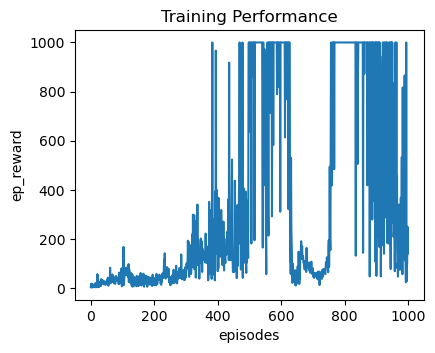

Training complete!


In [10]:
train(PGNoBase, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml') # < 7 mins

In [11]:
test(PGNoBase, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(save_video=True, testing=True)) 

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2023/ex5/results/InvertedPendulum-v4/model/InvertedPendulum-v4_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Average test reward: 1000.0


In [12]:
Video(Path().cwd()/'results'/'InvertedPendulum-v4'/'video'/'test'/'ex5-episode-2.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='T1b'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1b.</b> REINFORCE with a constant baseline b = 20 (5 points) </h3> 
    The training performance plot might look like Figure 1b.
    <figure style="text-align: center" id="figure-1b">
        <img src="imgs/PGBase20.svg" width="600px">
        <figcaption style="text-align: center"> Figure 1b: REINFORCE with a constant baseline 20. </figcaption>
    </figure>
    
🔝 <a href='#TOC'><b>Table of Contents</b></a>
</div>



In [13]:
class PGBase20(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)
        
    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # TODO: Task 1: Implement the policy gradient
        ########## Your code starts here. ##########
        # Hints:
        #   1. compute discounted rewards (use the discount_rewards function offered in utils.py)
        #   2. compute the policy gradient loss with the baseline
        #   3. update the parameters (backpropagate gradients, do the optimizer step, empty optimizer gradients afterwards so that gradients don't accumulate over updates)

        # Compute discounted rewards 
        b = 20
        disc_rewards = u.discount_rewards(rewards, self.gamma).unsqueeze(1) - b
        # Calculate the PG loss with the baseline
        act_pr = action_probs
        loss = - torch.mean(act_pr * disc_rewards)
        # Backprop gradients
        loss.backward()
        # Do the optimizer step
        self.optimizer.step()
        self.optimizer.zero_grad()
        ########## Your code ends here. ##########

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 50, 'ep_reward': 50.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 52, 'ep_reward': 52.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 55, 'ep_reward': 55.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 85, 'ep_reward': 85.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 241, 'ep_reward': 241.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': array([0.], d

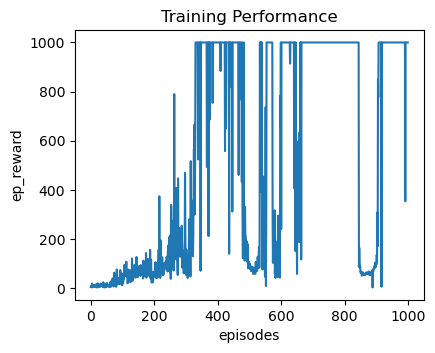

Training complete!


In [14]:
train(PGBase20, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml') # < 7 mins

In [15]:
test(PGBase20, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(save_video=True, testing=True)) 

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2023/ex5/results/InvertedPendulum-v4/model/InvertedPendulum-v4_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Average test reward: 1000.0


In [16]:
Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-2.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='T1c'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1c.</b> REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points) </h3> 
    The training performance plot might look like Figure 1c. 
    <figure style="text-align: center" id="figure-1c">
        <img src="imgs/PGGamma.svg" width="600px">
        <figcaption style="text-align: center"> Figure 1c: REINFORCE with discounted rewards normalized to zero mean and unit variance. </figcaption>
    </figure>
    
🔝 <a href='#TOC'><b>Table of Contents</b></a>
</div>



In [17]:
class PGNormalized(PG):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)
        
    def update(self):
        # Prepare dataset used to update policy
        action_probs = torch.stack(self.action_probs, dim=0).to(device).squeeze(-1) # shape: [batch_size,]
        rewards = torch.stack(self.rewards, dim=0).to(device).squeeze(-1) # shape [batch_size,]
        self.action_probs, self.rewards = [], [] # clean buffers
        
        # TODO: Task 1: Implement the policy gradient
        ########## Your code starts here. ##########
        # Hints:
        #   1. compute discounted rewards (use the discount_rewards function offered in utils.py)
        #   2. compute the policy gradient loss
        #   3. update the parameters (backpropagate gradients, do the optimizer step, empty optimizer gradients afterwards so that gradients don't accumulate over updates)
        
        # Compute discounted rewards and normalize them
        disc_rewards = u.discount_rewards(rewards, self.gamma).unsqueeze(1)
        disc_rewards = (disc_rewards - torch.mean(disc_rewards)) / torch.std(disc_rewards)
        # Calculate the PG loss
        act_pr = action_probs
        loss = - torch.mean(act_pr * disc_rewards)
        # Backprop gradients
        loss.backward()
        # Do the optimizer step
        self.optimizer.step()
        self.optimizer.zero_grad()
        ########## Your code ends here. ##########

        # if you want to log something in wandb, you can put them inside the {}, otherwise, just leave it empty.
        return {'logstd': self.policy.actor_logstd.cpu().detach().numpy()}

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.], dtype=float32), 'timesteps': 5, 'ep_reward': 5.0, 'episodes': 0}
{'ep': 100, 'logstd': array([0.], dtype=float32), 'timesteps': 77, 'ep_reward': 77.0, 'episodes': 100}
{'ep': 200, 'logstd': array([0.], dtype=float32), 'timesteps': 70, 'ep_reward': 70.0, 'episodes': 200}
{'ep': 300, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 300}
{'ep': 400, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 400}
{'ep': 500, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 500}
{'ep': 600, 'logstd': array([0.], dtype=float32), 'timesteps': 540, 'ep_reward': 540.0, 'episodes': 600}
{'ep': 700, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 700}
{'ep': 800, 'logstd': array([0.], dtype=float32), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': array

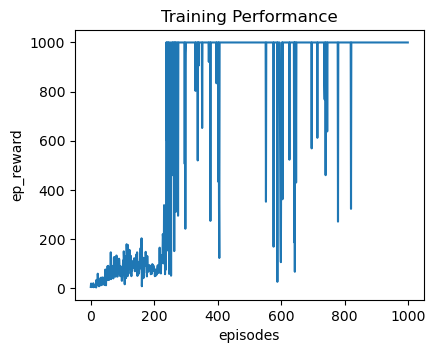

Training complete!


In [18]:
train(PGNormalized, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml') # < 10 mins

In [19]:
test(PGNormalized, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(save_video=True, testing=True)) 

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2023/ex5/results/InvertedPendulum-v4/model/InvertedPendulum-v4_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Average test reward: 1000.0


In [20]:
Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-5.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> A good baseline (15 points) </h3> 

How would you choose a good value for the baseline? Why is the training more stable when using a baseline? **Justify your answer.**
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

1. A suitable baseline is to choose an initial estimate of the state value. This estimate is a function of the state at time 't' and involves a weight vector 'w'.

2. During the training process, backpropagating cumulative discounted rewards can create a situation where even a seemingly 'bad' action taken in an otherwise 'good' episode may result in a strong positive incentive for repeating that action in subsequent episodes. This can lead to high variability in action selection.

3. The use of a baseline enhances training stability by reducing this variance. It achieves this by shifting the cumulative discounted rewards to a lower value. This reduction in reward magnitude, in turn, lessens the impact of gradient ascent updates. Importantly, using a baseline does not introduce bias because the baseline does not depend on the chosen action 'a,' resulting in a multiplication of the gradient by zero.

# 3. Choosing the value of variance <a id='3.'></a>

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Making Variance a Learnable Parameter (10 points) </h3> 

Implement the policy’s variance as a learnable parameter of the network and update it during training. Set the initial value $\sigma_0^2$ to 1. REINFORCE with normalized discounted returns is used for this task.

**Complete the unfinished implementation in ```PolicyLearnedVar(nn.Module)``` class (marked with ```TODOs```)**. 
    
    
**Hint:** To make your learned variance automatically updated by the optimizer, declare your variable inside the ```__init__``` function of the model using ```torch.nn.Parameter(some_tensor)```. 
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


## 3.1 Policy with Learned Variance <a id='3.1'></a>

In [21]:
# Initialisation function for neural network layers
def layer_init(layer, std=np.sqrt(2), bias_const=0.0):
    torch.nn.init.orthogonal_(layer.weight, std)
    torch.nn.init.constant_(layer.bias, bias_const)
    return layer


# This class defines the neural network policy with learned variance
class PolicyLearnedVar(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(PolicyLearnedVar, self).__init__()

        # Initialise a neural network with two hidden layers (64 neurons per layer)
        self.actor_mean = nn.Sequential(
            layer_init(nn.Linear(state_dim, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, 64)),
            nn.Tanh(),
            layer_init(nn.Linear(64, action_dim), std=0.01),
        )

        # TODO: Task 2: Implement actor_logstd as a learnable parameter
        # Use log of std to make sure std doesn't become negative during training
        ########## Your code starts here. ###########    
        self.actor_logstd =  torch.nn.parameter.Parameter(torch.tensor(np.zeros(action_dim), device = device))
        ########## Your code ends here. ##########
        
    # Do a forward pass to map state to action
    def forward(self, state):
        # Get mean of a Normal distribution (the output of the neural network)
        action_mean = self.actor_mean(state)

        # Make sure action_logstd matches dimension of action_mean
        action_logstd = self.actor_logstd.expand_as(action_mean)

        # Exponentiate the log std to get actual std
        action_std = torch.exp(action_logstd)

        # TODO: Task 1: Create a Normal distribution with mean of 'action_mean' and standard deviation of 'action_std', and return the distribution
        ########## Your code starts here. ###########
        probs = Normal(action_mean, action_std)
        ########## Your code ends here. ##########
        return probs

Initialize the `PG` class to construct the neural network policy. Continue to employ the `get_action` function, as outlined in Task 1.

In [24]:
# Class for the Policy Gradient algorithm
class PGLearnedVar(PGNormalized):
    def __init__(self, state_dim, action_dim, lr, gamma):
        super().__init__(state_dim, action_dim, lr, gamma)
        
        # TODO: Task 2: Define the neural network policy (self.policy) with learned variance.
        self.policy = None
        ########## Your code starts here. ###########  
        self.policy = PolicyLearnedVar(state_dim, action_dim).to(device)
        ########## Your code ends here. ##########

        # Create an optimizer
        self.optimizer = torch.optim.Adam(self.policy.parameters(), lr=lr)

Numpy/Torch/Random Seed:  409
{'ep': 0, 'logstd': array([0.002]), 'timesteps': 4, 'ep_reward': 4.0, 'episodes': 0}
{'ep': 100, 'logstd': array([-0.02779322]), 'timesteps': 58, 'ep_reward': 58.0, 'episodes': 100}
{'ep': 200, 'logstd': array([-0.05860815]), 'timesteps': 170, 'ep_reward': 170.0, 'episodes': 200}
{'ep': 300, 'logstd': array([-0.07411037]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 300}
{'ep': 400, 'logstd': array([-0.07485775]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 400}
{'ep': 500, 'logstd': array([-0.08763894]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 500}
{'ep': 600, 'logstd': array([-0.0878118]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 600}
{'ep': 700, 'logstd': array([-0.09442639]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 700}
{'ep': 800, 'logstd': array([-0.09558986]), 'timesteps': 1000, 'ep_reward': 1000.0, 'episodes': 800}
{'ep': 900, 'logstd': array([-0.12467409]), 'timesteps': 1000, 'ep_reward': 1000.0, 

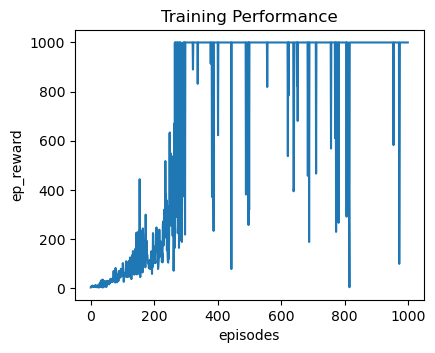

Training complete!


In [25]:
train(PGLearnedVar, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml') # < 10 mins

In [26]:
test(PGLearnedVar, cfg_path=Path().cwd() / 'cfg' / 'inverted_pendulum.yaml', cfg_args=dict(save_video=True, testing=True))

Numpy/Torch/Random Seed:  409
Loading model from /notebooks/rl2023/ex5/results/InvertedPendulum-v4/model/InvertedPendulum-v4_params.pt ...
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Test ep_reward: 1000.0
Average test reward: 1000.0


In [29]:
Video(Path().cwd() / 'results' / 'InvertedPendulum-v4' / 'video' / 'test' / 'ex5-episode-5.mp4',
      embed=True, html_attributes="loop autoplay") # Set html_attributes="controls" for video control

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.1</b> Constant vs Learnable Variance (5 points) </h3> 

What are the strong and weak sides of using either a) constant variance during training, or b) learning the variance during training? **Please explain.**       
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

### Pros of Using Constant Variance during Training:

1. Exploration Encouragement: When set appropriately, constant variance can foster exploration, enabling the model to discover better strategies or solutions.

2. Simplicity: Using constant variance requires no additional calculations, making the training process more straightforward and efficient.

3. Consistency: It maintains a consistent level of randomness in action selection throughout training, which can be advantageous in various applications.

### Cons of Using Constant Variance during Training:

1. Manual Configuration: Constant variance has to be configured by hand, which can be error-prone. Selecting an improper value can negatively impact training outcomes.

2. Long Training Time: If the variance is set too high, it can lead to suboptimal actions, and the learning process may take a considerably long time to converge to optimal performance.

3. Initial Value Sensitivity: Choosing the right initial value for the constant variance is critical. An inadequate initial value can lead to a permanent decrease in performance, which can be challenging to rectify.

### Pros of Using Learnable Variance:

1. Efficient Knowledge Exploitation: Learnable variance enables the agent to effectively leverage its acquired knowledge, allowing it to exploit known solutions more efficiently. This can lead to faster learning and better performance.

2. Acceleration of Learning Process: Learning an appropriate solution can be expedited, as the agent can adapt its policy and strategy more dynamically by adjusting the variance. This potentially accelerates the learning process.

### Cons of Using Learnable Variance:

1. Premature Policy Confidence: One drawback is that the agent may become overly confident in its policy too early in the learning process. This premature confidence can lead to a cessation of exploration, potentially preventing the discovery of better policies.

2. Reduced Exploration: Overreliance on learned variance might cause the agent to stop exploring prematurely, limiting its ability to find potentially superior strategies or actions.

3. Higher Computation Time: Computation Time is higher because we are using a neural network to learn a value that was set from the outside in the previous cases.


<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 2.2</b> Learnable Variance Initial Performance (5 points) </h3> 

In case of a learned variance, what’s the impact of the initialization on the training performance? **Please explain.**  

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

### Insufficient Exploration with Small Initialization:
1. Initializing the learned variance to an extremely small value can impede exploration.

2. Limited exploration can slow down the learning process or even prevent it from finding optimal solutions.

### Excessive Randomization with High Initialization:
1. Conversely, initializing the learned variance to an extremely high value can lead to excessively randomized action selection.

2. This randomness can hinder the convergence of the learning process and make it difficult to reach an optimal policy.

### Appropriate Initialization for Faster Convergence:
1. Optimal initialization of learned variance involves considering pre-existing knowledge about the problem.

2. A well-chosen initialization can facilitate faster convergence toward an optimal policy, striking a balance between exploration and exploitation.

# 4. PG and experience replay <a id='4.'></a>

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 3.</b> Considering an experience replay buffer (15 points) </h3> 

Why the method implemented in this exercise could not be **directly** used with an experience replay? Which steps of the algorithm would be problematic to perform with an experience replay? How any problematic steps could be resolved? **Explain your answer**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

1. Experience replay is fundamentally associated with an Off-Policy learning method.

2. The current exercise, however, employs an On-Policy approach, where the policy being learned matches the one used for action selection.

3. The use of the same policy for both action selection and gradient ascent optimization poses a challenge, particularly when attempting to integrate experience replay techniques.


#### To resolve this challenge, a practical approach involves implementing two distinct policies: 
1. Behavioral Policy: This policy is responsible for action sampling, ensuring a diverse range of experiences.

2. Target Policy: The target policy, on the other hand, is employed for policy optimization during the learning process.

Moreover, we can consider importance sampling:

1. The key to enabling policy gradient methods to utilize off-policy samples is the clever application of importance sampling.

2. Importance sampling allows for the estimation of rewards associated with one policy using samples generated from a different policy.

# 5. Real-world control problems <a id='5.'></a>

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Considering an unbounded continuous action space part 1 (5 points) </h3> 

What could go wrong when a model with an **unbounded** continuous action space and a reward function like the one used here (+1 for survival) were to be used with a physical system?

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

In the case of a model dealing with an unbounded continuous action space and a reward function primarily centered on survival, there's a potential for the model to learn actions of exceptionally high value. This can occur, for instance, when the model rapidly alternates between two courses of action. 

However, this approach may have adverse consequences in the real world. In practice, the real-world implications of such learned behaviors can be problematic and even dangerous. The model, in its quest for survival, may push equipment beyond their safe operational limits. This could lead to mechanical failures, potential safety hazards, and damage to the system itself.

<a id='Q6'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Considering an unbounded continuous action space part 2 (10 points) </h3> 

How could the problems appearing in Question 4.1 be mitigated without putting a hard limit on the actions? **Explain your answer.**

🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

One effective strategy is to introduce costs within the reward function to shape the agent's behavior. By penalizing certain actions through this modified reward function, we can discourage the agent from engaging in specific behaviors that may lead to unfavorable outcomes.

# 6. Discrete action spaces <a id='6.'></a>

<a id='Q7'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 5.</b> Considering discrete action spaces (10 points) </h3> 

Can policy gradient methods be used with discrete action spaces? Why/why not? Which steps of the algorithm would be problematic to perform, if any? **Explain your answer.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Policy gradient methods are adaptable to discrete action spaces through the computation of policy gradients. By employing categorical or softmax distributions rather than normal distributions, we can efficiently compute and propagate gradients through these categorical distributions, facilitating the use of discrete action bases in policy gradient methods. In cases where the action space is discrete and not overly extensive, policy gradient methods can be effectively applied by parameterizing the policy with numerical preferences for each state-action pair. Actions with the highest preferences within each state are assigned the highest probabilities of selection, typically following an exponential softmax distribution. This approach allows policy gradient methods to be applied seamlessly in scenarios involving discrete action spaces, enabling effective learning and decision-making.

# 7. Submitting <a id='7.'></a>

Ensure all tasks and questions in `ex5.ipynb` are thoroughly answered and that all the relevant plots are displayed correctly (there is no need to save the plots in the results folder). 

The training performance plots are as follows:

- **Task 1a, REINFORCE without baseline**: Ensure the implementation is correct and the plot is similar to the expected plot shown in the task description. Refer to [Figure 1a](#figure-1a).
  
- **Task 1b, REINFORCE with constant baseline b = 20**: Properly implement the algorithm with a constant baseline and plot the training performance. Refer to [Figure 1b](#figure-1b).
  
- **Task 1c, REINFORCE with discounted rewards normalized to zero mean and unit variance**: Implement and plot the performance ensuring the rewards are normalized correctly. Refer to [Figure 1c](#figure-1c).
  
- **Task 2, REINFORCE with learned variance**: Ensure that the variance is being learned and adjusted during training, and plot the training performance.

No model files need to be saved for this assignment.

🔝 [Back to Table of Contents](#TOC)


## 7.1 Feedback <a id='7.1'></a>

In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)



In [ ]:
hrs = None

2) Difficulty of each task/question from 1-5 (int or float)

In [ ]:
T1a = None   # Task 1a. basic REINFORCE without baseline (15 points)
T1b = None   # Task 1b. REINFORCE with a constant baseline b = 20 (5 points)
T1c = None   # Task 1c. REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points)
Q1_1 = None  # Question 1.1 A good baseline (15 points)
T2 = None    # Task 2. Making Variance a Learnable Parameter (10 points)
Q2_1 = None  # Question 2.1 Constant vs Learnable Variance (5 points)
Q2_2 = None  # Question 2.2 Learnable Variance Initial Performance (5 points)
Q3 = None    # Question 3. Considering a experience reply buffer (15 points)
Q4_1 = None  # Question 4.1 Considering an unbounded continuous action space part 1 (5 points)
Q4_2 = None  # Question 4.2 Considering an unbounded continuous action space part 2 (10 points)
Q5 = None    # Question 5. Considering discrete action spaces (10 points)

3) How well did you understand the content of the task/question from 1-5? (int or float)

In [ ]:
T1a = None   # Task 1a. basic REINFORCE without baseline (15 points)
T1b = None   # Task 1b. REINFORCE with a constant baseline b = 20 (5 points)
T1c = None   # Task 1c. REINFORCE with discounted rewards normalized to zero mean and unit variance (5 points)
Q1_1 = None  # Question 1.1 A good baseline (15 points)
T2 = None    # Task 2. Making Variance a Learnable Parameter (10 points)
Q2_1 = None  # Question 2.1 Constant vs Learnable Variance (5 points)
Q2_2 = None  # Question 2.2 Learnable Variance Initial Performance (5 points)
Q3 = None    # Question 3. Considering a experience reply buffer (15 points)
Q4_1 = None  # Question 4.1 Considering an unbounded continuous action space part 1 (5 points)
Q4_2 = None  # Question 4.2 Considering an unbounded continuous action space part 2 (10 points)
Q5 = None    # Question 5. Considering discrete action spaces (10 points)

4) General feedback. Consider questions like:

    - Did the content of the lecture relate well with the assignment?
    - To what extent did you find the material to be potentially useful for your research and studies?
    
And other feedback you think is worth including. Type in the box below

In [ ]:
DOUBLE CLICK HERE TO EDIT, CLEAR THIS TEXT AND ANSWER HERE


# References <a id='8.'></a>